# Name & ID


In [1]:
Name= """"BASIL ALASHQAR
          Ahmad Almutawa 
          Mussad Altorig
          Farouk Alyase
          Hawam Al Theeban"""    

In [2]:
ID= 202045700,202031640,201737110,201841760,201912330

# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# 2.A

In [4]:
df = pd.read_csv('Data.csv', delimiter =',')
display(df.head())
display(df.info())
print(df.shape)

Transaction_id  customer_id        Date    Product  Gender Device_Type  \
0           40170   1348959766  14/11/2013  Hair Band  Female         Web   
1           33374   2213674919   5/11/2013  Hair Band  Female         Web   
2           14407   1809450308   1/10/2013  Hair Band  Female         Web   
3           15472   1691227134   4/10/2013  Hair Band  Female         Web   
4           18709   2290737237  12/10/2013  Hair Band  Female         Web   

         Country       State           City     Category Customer_Login_type  \
0  United States    New York  New York City  Accessories              Member   
1  United States  California     Los Angles  Accessories              Member   
2  United States  Washington        Seattle  Accessories              Member   
3  United States  Washington        Seattle  Accessories              Member   
4  United States  Washington        Seattle  Accessories              Member   

     Delivery_Type   Quantity   Transaction Start Amount US$  \
0  one-day deliver          12                  1      6,910   
1  one-day deliver          17                  1      1,699   
2  Normal Delivery          23                  1      4,998   
3  Normal Delivery          23                  1        736   
4  Normal Delivery          23                  1      4,389   

  Individual_Price_US$ Year_Month      Time  Transaction_Result  
0                  576     13-Nov  22:35:51                   0  
1                  100     13-Nov   6:44:41                   1  
2                  217     13-Oct   0:41:24                   0  
3                   32     13-Oct  22:04:03                   0  
4                  191     13-Oct  15:00:46                   1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_id        65535 non-null  int64 
 1   customer_id           65535 non-null  int64 
 2   Date                  65535 non-null  object
 3   Product               65535 non-null  object
 4   Gender                65535 non-null  object
 5   Device_Type           65535 non-null  object
 6   Country               65535 non-null  object
 7   State                 65535 non-null  object
 8   City                  65535 non-null  object
 9   Category              65535 non-null  object
 10  Customer_Login_type   65535 non-null  object
 11  Delivery_Type         65535 non-null  object
 12   Quantity             65535 non-null  int64 
 13  Transaction Start     65535 non-null  int64 
 14  Amount US$            65534 non-null  object
 15  Individual_Price_US$  65535 non-null

None

(65535, 19)


|     Field|     Type    |     Dtype    |
|:------------:|:------------:| :-----------:|
|    Transaction_id  | Nominal | int64 |
|  customer_id  |   Nominal   | int64 |
|  Date  |   Numeric   | Object |
|    Product   |   Categorical   |  object |
|   Gender  |   Categorical   |  object |
|   Device_Type  | Categorical |  object |
|   Country      | Categorical |  object |
|   Customer_Login_type  |   Categorical   |  object |
|   Delivery_Type      |   Categorical   |  object |
|  Quantity     |   Numeric   | int64 |
|  Transaction Start  |   Nominal   | int64 |
|   Transaction_Result      | Nominal |  int64 |
|   Amount US   |  Numeric |  int64 |
| Individual_Price_US  |  Numeric |  int64 |
|  Year_Month  |   Nominal   | Object |
|  Time |   Numeric   | Object |

# 2.B

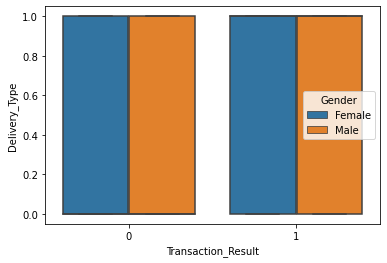

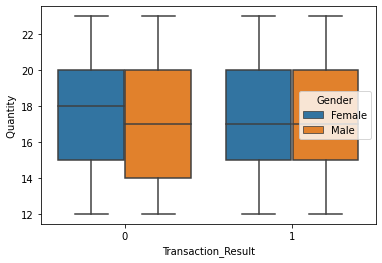

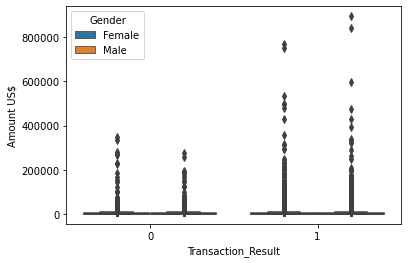

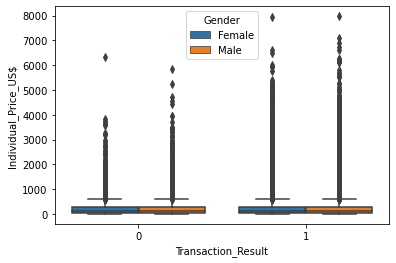

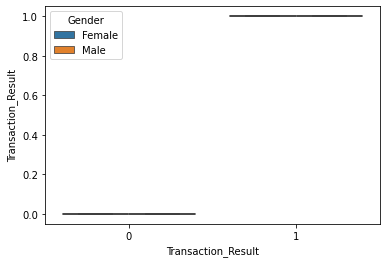

Product  Gender Device_Type       State           City     Category  \
0      Hair Band  Female         Web    New York  New York City  Accessories   
1      Hair Band  Female         Web  California     Los Angles  Accessories   
2      Hair Band  Female         Web  Washington        Seattle  Accessories   
3      Hair Band  Female         Web  Washington        Seattle  Accessories   
4      Hair Band  Female         Web  Washington        Seattle  Accessories   
...          ...     ...         ...         ...            ...          ...   
65528      Shoes  Female      Mobile  Washington        Seattle    wearables   
65529      Shoes  Female      Mobile  Washington        Seattle    wearables   
65530      Shoes  Female      Mobile  Washington        Seattle    wearables   
65531      Shoes  Female      Mobile  Washington        Seattle    wearables   
65533      Shoes  Female      Mobile  Washington        Seattle    wearables   

      Customer_Login_type  Delivery_Type   Quantity   Amount US$  \
0                  Member              1          12        6910   
1                  Member              1          17        1699   
2                  Member              0          23        4998   
3                  Member              0          23         736   
4                  Member              0          23        4389   
...                   ...            ...         ...         ...   
65528              Member              0          16         748   
65529              Member              1          14        4080   
65530              Member              0          20        5895   
65531              Member              0          16         299   
65533              Member              0          22        8680   

       Individual_Price_US$ Year_Month  Transaction_Result  
0                       576     13-Nov                   0  
1                       100     13-Nov                   1  
2                       217     13-Oct                   0  
3                        32     13-Oct                   0  
4                       191     13-Oct                   1  
...                     ...        ...                 ...  
65528                    47     13-Dec                   1  
65529                   291     13-Dec                   1  
65530                   295     13-Dec                   1  
65531                    19     13-Dec                   0  
65533                   395     13-Dec                   0  

[59407 rows x 13 columns]

In [5]:
#Revolving inconcistancy
## AMOUNT US$ and Individual Price US$ are identified as strings so we have to change it to numerical type 
## after we fix all the noise by removing commas between numbers and impute the Null rows.
df["Amount US$"] = df["Amount US$"].str.replace(',','')
df['Individual_Price_US$'] = df['Individual_Price_US$'].str.replace('#VALUE!','1')
df['Individual_Price_US$'] = df['Individual_Price_US$'].str.replace(',','')
df['Amount US$'] = df['Amount US$'].astype(float)
df['Individual_Price_US$'] = df['Individual_Price_US$'].astype(int)
null_columns=df.columns[df.isna().any()]
df['Amount US$'].fillna(value=df['Amount US$'].mean())
df['Individual_Price_US$'].fillna(value=df['Individual_Price_US$'].mean())
df['Amount US$'] = df['Amount US$'].fillna(value=df['Individual_Price_US$'].mean())
df['Amount US$'] = df['Amount US$'].astype('int')



## We don't need Transaction_id and customer_id in our data as it will won't benefit us.
df.drop(labels = 'Transaction_id', axis = 1, inplace = True)
df.drop(labels = 'customer_id', axis = 1, inplace = True)
## These columns are encoded by one-hot encoding (0 for no and 1 for Yes FOR Transaction_Result)
## then, we converted it to str so that it doesn't affect the statistics as numbers.
#df['Transaction_Result'] = df['Transaction_Result'].astype(str)
## Since Transaction_start is always 1 it will not benefit our data so we have to drop it.
df.drop(labels = 'Transaction Start', axis = 1, inplace = True)

## Since Delivery_Type is only ("one-day deliver" and "Normal Delivery") we can encode it to 1 for one-day deliver
## and 0 for Normal-Delivery
delivery_mapping = {'one-day deliver' : 1, 
                'Normal Delivery': 0}
df['Delivery_Type'] = df['Delivery_Type'].map(delivery_mapping)
## Since Date is repeated in Date column and Year_Month we can remove one of them.
df.drop(labels = 'Date', axis = 1, inplace = True)
## Exact time will not affect our data so we can remove it
df.drop(labels = 'Time', axis = 1, inplace = True)
##  state and city will be enough for our data no need for country since its always united states.
df.drop(labels = 'Country', axis = 1, inplace = True)
indices_to_keep=~df.isin([np.nan, np.inf, -np.inf]).any(1)
import numpy as np
from scipy import stats
num_columns = df.select_dtypes(exclude='object').columns
# Show outliers
for c in num_columns:
    plt.figure()
    sns.boxplot(y=c,x='Transaction_Result', hue='Gender',data=df)
    plt.show()
## Remove outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
remove_outlier(df, 'Amount US$')
remove_outlier(df, 'Individual_Price_US$')

# 3.A.I

In [6]:
display(df.describe(include='number').T)
display(df.describe(include='object').T)

count         mean           std   min    25%     50%  \
Delivery_Type         65535.0     0.508324      0.499935   0.0    0.0     1.0   
 Quantity             65535.0    17.154299      3.270824  12.0   15.0    17.0   
Amount US$            65535.0  4585.007202  13779.851771   0.0  648.0  1999.0   
Individual_Price_US$  65535.0   247.774838    439.364813   0.0   39.0   115.0   
Transaction_Result    65535.0     0.867353      0.339195   0.0    1.0     1.0   

                         75%       max  
Delivery_Type            1.0       1.0  
 Quantity               20.0      23.0  
Amount US$            4571.0  894869.0  
Individual_Price_US$   269.0    7969.0  
Transaction_Result       1.0       1.0

count unique             top   freq
Product              65535     12  Fairness Cream  23516
Gender               65535      2            Male  37295
Device_Type          65535      2             Web  52989
State                65535      3      Washington  39820
City                 65535      3         Seattle  39820
Category             65535      8         Fashion  31317
Customer_Login_type  65535      4          Member  62997
Year_Month           65535      5          13-Nov  22527

# 3.A.II

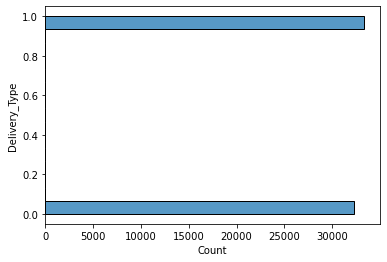

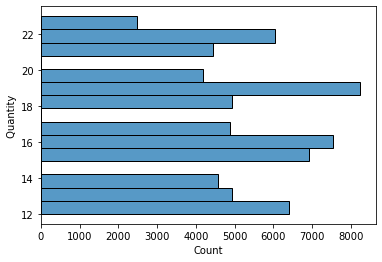

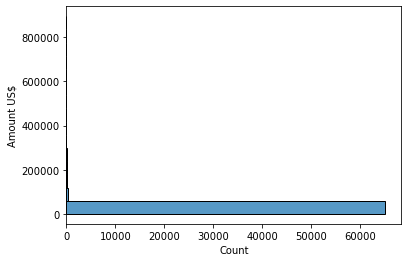

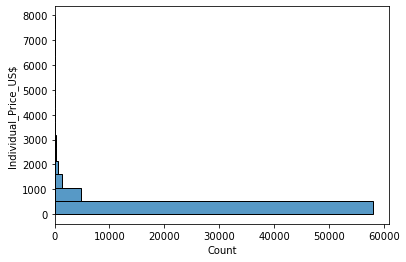

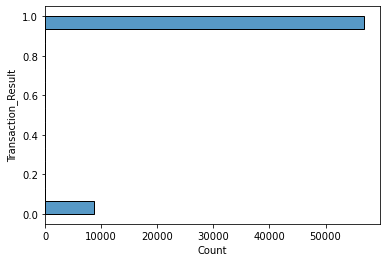

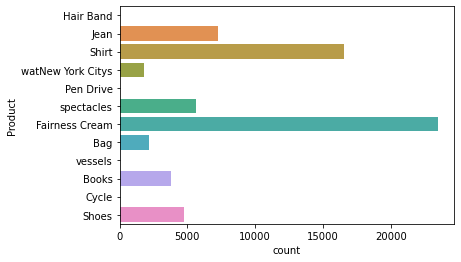

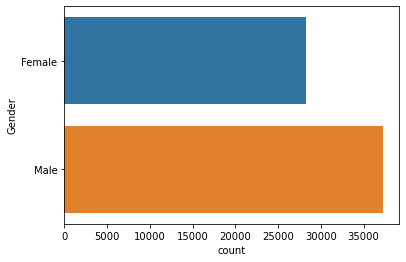

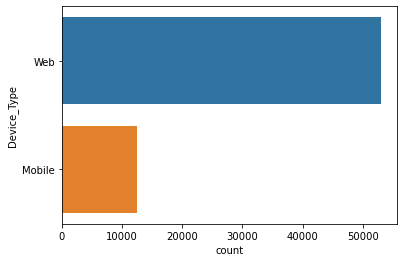

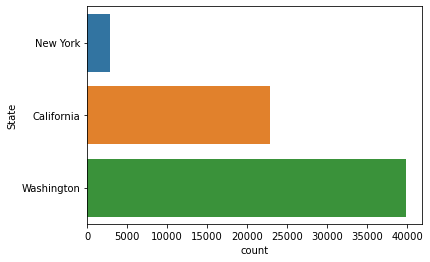

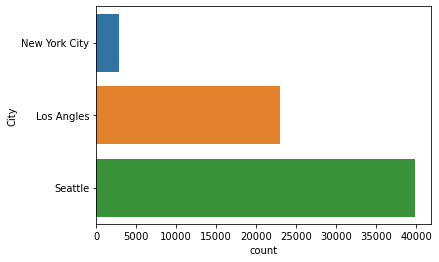

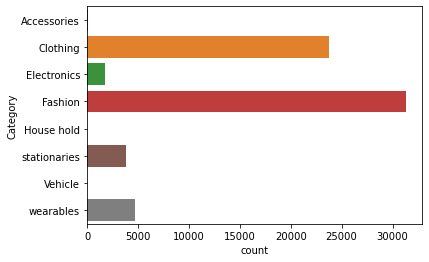

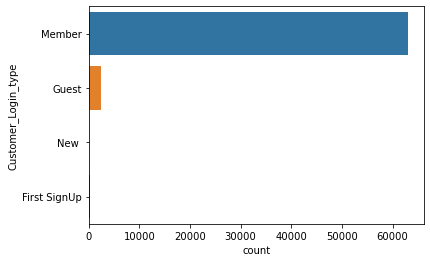

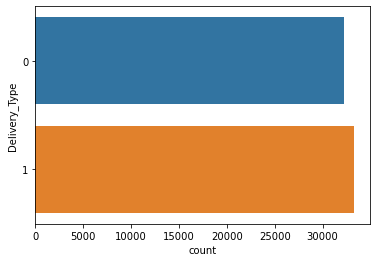

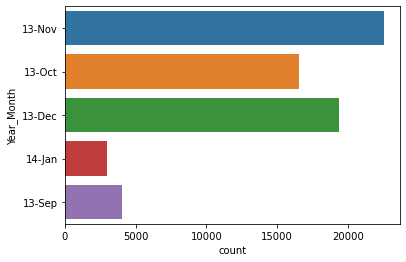

In [7]:
#ii. Univariate Graphs
num_columns = df.select_dtypes(exclude='object').columns
catg_columns = df.select_dtypes(include='object').columns
cat_columns = ["Product","Gender","Device_Type","State","City","Category","Customer_Login_type","Delivery_Type","Year_Month"]

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

for c in num_columns:
    plt.figure()
    sns.histplot(y=c,bins=15,data=df);
    plt.show()
    
for c in cat_columns:
    plt.figure()
    sns.countplot(y=c,data=df)
    plt.show()

# 3.A.III

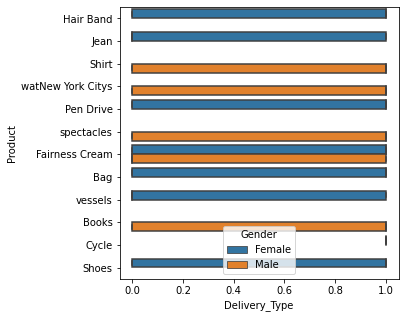

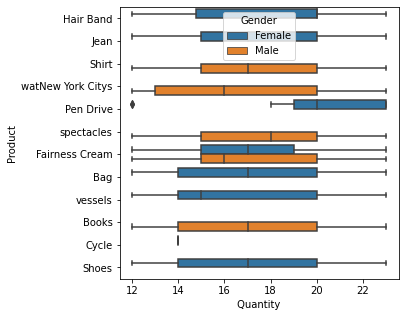

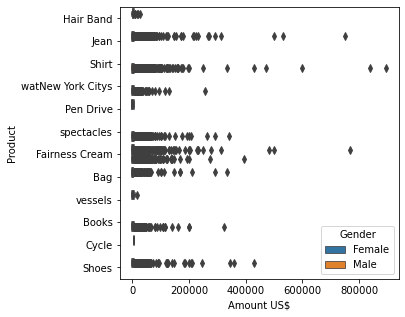

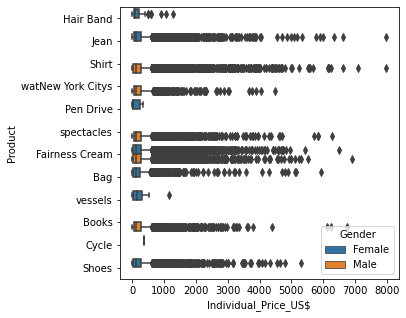

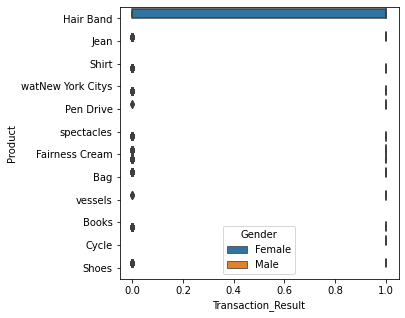

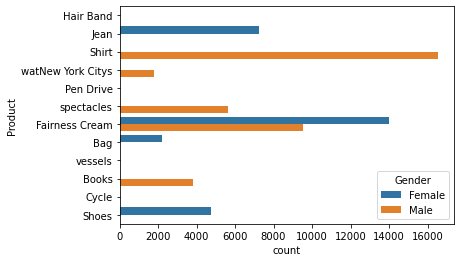

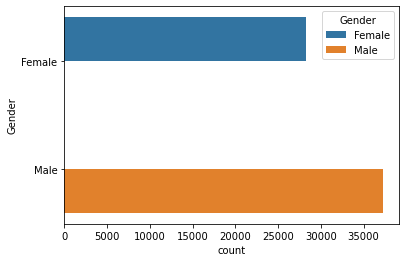

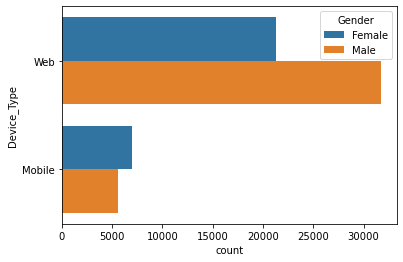

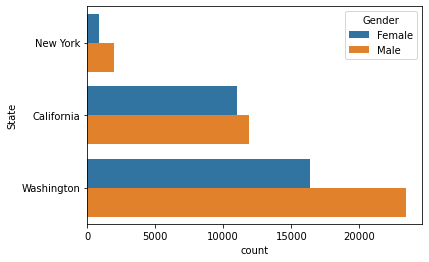

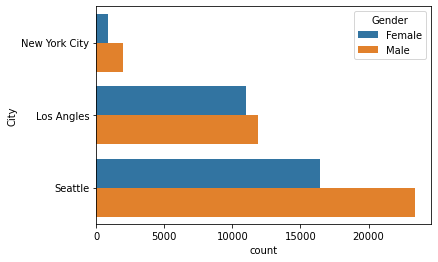

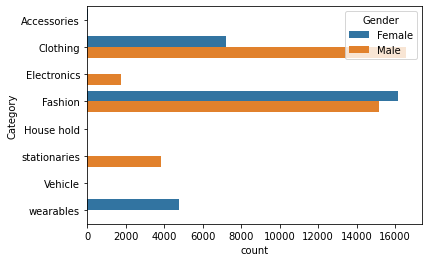

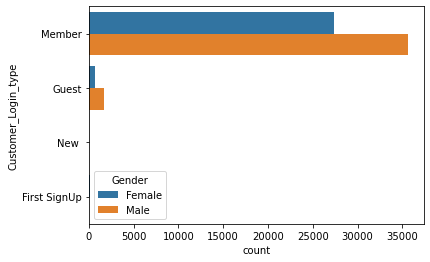

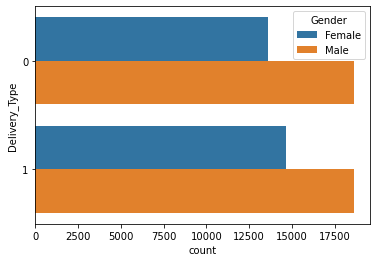

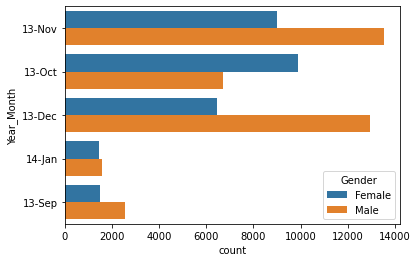

In [8]:
#iii. bivariate plot
for c in num_columns:
    plt.figure(figsize=(5,5))
    sns.boxplot(x=c,y="Product",hue="Gender",data=df);
    plt.show()

for c in cat_columns:
    plt.figure()
    sns.countplot(y=c, hue="Gender",data=df)
    plt.show()

# 3.A.IV

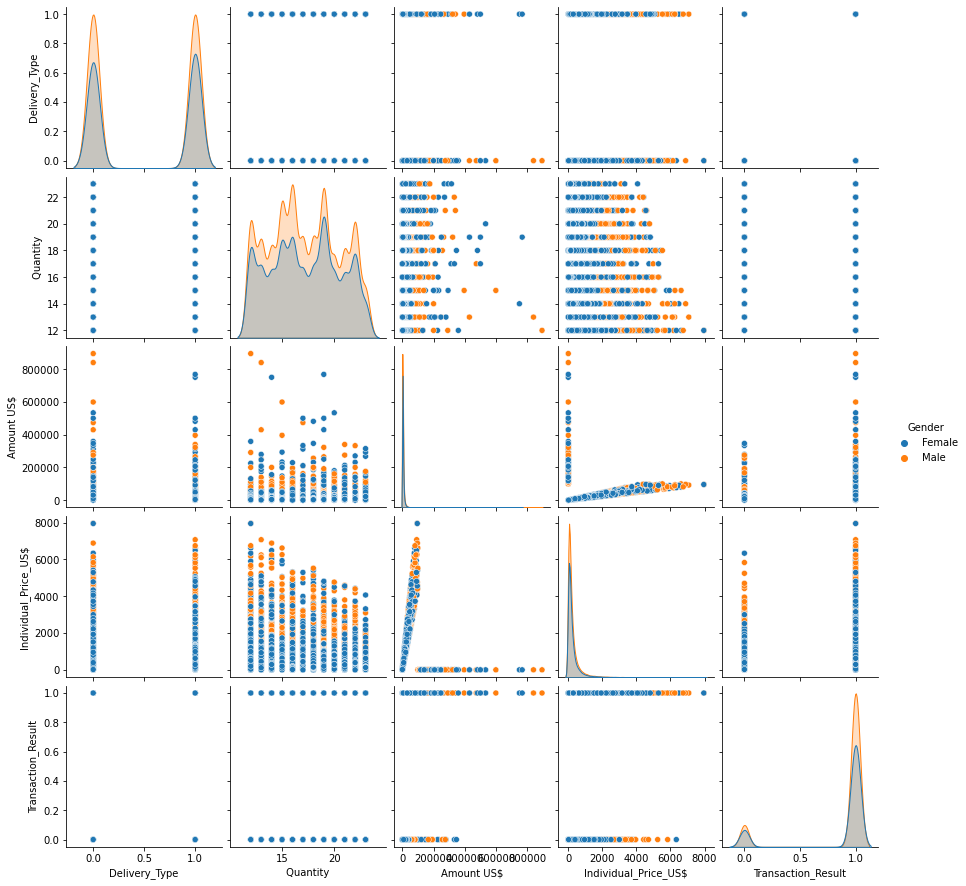

In [9]:
#iv. advanced graphs

sns.pairplot(df, hue= "Gender")

# 3.A.V 

In [10]:
#v. Assess the relationship between variables.
corr = df.corr()
display(corr.style.background_gradient(cmap='coolwarm'))

# 3.B.I

- In 3.A.I, We have dropped the Transaction_ID and Customer_ID since it does not represent any statistical data, therefore it does not have mean, max and etc..
- In 3.A.II from the count Plots we can see that the products quantity is mostly the same with small differences for all products. Also, We can Infer that the Fairness Cream is the most ordered product during all the time. 
- In 3.A.III from the Plots, we can infer that male customers who use a Web device and mostly there were from Washinghton, those who have the highest successfull transactions. 
- In 3.A.IV, We can see from the scatterplots that customers who spend more money (Amount US$)  who tend to complete their transaction succesfully, while those who spend a low amount of money tend to cancel their transaction, thus, not compeleting the order, 
- In 3.A.V, As can be seen as the quantity increase the indiviual price decrease and Transaction result became more success.

# 4
- We have selected the classification method because this study's overarching goal is to establish a connection between the input variables and the outcome. Specifically, conduct a classification analysis, and capture the underlying relationship.

# 4.A

In [11]:
# Firstly we have to convert all data to numerical data using label-encoding (Dictionary encoding)
product_mapping = {'Hair Band':0 , 'Jean': 1, 'Shirt':2, 'watNew York Citys': 3, 'Pen Drive': 4,'spectacles':5, 'Fairness Cream':6, 'Bag': 7, 'Books': 8,'Cycle':9, 'Shoes':10}
df['Product'] = df['Product'].map(product_mapping)
gender_mapping = {'Female' :0, 'Male': 1}
df['Gender'] = df['Gender'].map(gender_mapping)
device_mapping = {'Web' :0, 'Mobile': 1}
df['Device_Type'] = df['Device_Type'].map(device_mapping)
state_mapping = {'New York':0 , 'California': 1, 'Washington':2}
df['State'] = df['State'].map(state_mapping)
city_mapping = {'New York City':0 , 'Los Angles': 1, 'Seattle':2}
df['City'] = df['City'].map(city_mapping)
category_mapping = {'Accessories':0 , 'Clothing': 1, 'Electronics':2, 'Fashion': 3, 'House hold': 4,'stationaries':5, 'Vehicle':6, 'wearables': 7}
df['Category'] = df['Category'].map(category_mapping)
customer_Login_type_map = {'Member':0 , 'Guest':1, 'New':2, 'First SignUp':3}
df['Customer_Login_type']=df['Customer_Login_type'].map(customer_Login_type_map)
year_month_map = {'13-Nov':0 , '13-Oct':1, '13-Dec':2, '14-Jan':3, '13-Sep':4}
df['Year_Month']=df['Year_Month'].map(year_month_map)
indices_to_keep=~df.isin([np.nan, np.inf, -np.inf]).any(1)
df=df[indices_to_keep].astype(int)

In [12]:
Xc = df.iloc[:,:-1].values
yc = df.iloc[:, -1].values
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.3, random_state=42)
np.unique(yc_test, return_counts=True)

scaler = StandardScaler()
scaler.fit(Xc_train)

Xc_train = scaler.transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

In [13]:
#Random Forest
rf = RandomForestClassifier(n_estimators=8,criterion='entropy', random_state=0)#max_features=auto default,
rf = rf.fit(df.drop('Transaction_Result', axis=1), df['Transaction_Result'])
fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize = (10,10), dpi=1000)
for index,axis in enumerate(axes.flatten()):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = df.columns[0:-1], 
                   class_names=['No', 'Yes'],
                   filled = True,
                   max_depth=4,
                   ax = axis);
    axis.set_title('Estimator: ' + str(index+1), fontsize = 11)

In [14]:
#Decision tree output
dtClf = tree.DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='best')
dtClf = dtClf.fit(Xc_train,yc_train)

plt.figure(figsize =(10,10),dpi=1000)
tree.plot_tree(dtClf,feature_names=df.columns[:-1].tolist(),class_names=['0','1'],filled=True,rounded=True, max_depth=8); 
plt.show()
print(tree.export_text(dtClf,feature_names=df.columns[:-1].tolist()))




|--- City <= -0.12
|   |--- City <= -1.85
|   |   |---  Quantity  <= 0.11
|   |   |   |--- Product <= -1.59
|   |   |   |   |--- class: 0
|   |   |   |--- Product >  -1.59
|   |   |   |   |--- Product <= 0.68
|   |   |   |   |   |---  Quantity  <= -0.20
|   |   |   |   |   |   |--- Amount US$ <= 8.82
|   |   |   |   |   |   |   |--- Amount US$ <= 0.05
|   |   |   |   |   |   |   |   |--- Individual_Price_US$ <= 0.11
|   |   |   |   |   |   |   |   |   |--- Customer_Login_type <= 1.86
|   |   |   |   |   |   |   |   |   |   |--- Individual_Price_US$ <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 18
|   |   |   |   |   |   |   |   |   |   |--- Individual_Price_US$ >  0.03
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Customer_Login_type >  1.86
|   |   |   |   |   |   |   |   |   |   |--- Amount US$ <= -0.06
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   

In [15]:
#Decision Tree 
dt_y_pred = dtClf.predict(Xc_test)
print("Decision Tree: \n")
print("Accuracy for Decision Tree:=",  round(accuracy_score(yc_test, dt_y_pred),2))
print("Confusion Matrix:= \n", confusion_matrix(yc_test, dt_y_pred) )

NBClf = GaussianNB()   
NBClf.fit(Xc_train,yc_train)
NB_y_pred = NBClf.predict(Xc_test)
print("\nGNB for Numerical Data: \n")
print("Accuracy for GNB:=",  round(accuracy_score(yc_test, NB_y_pred),2))
print("Confusion Matrix for GNB:= \n", confusion_matrix(yc_test, NB_y_pred) )

Decision Tree: 

Accuracy for Decision Tree:= 0.78
Confusion Matrix:= 
 [[  386  2250]
 [ 2159 14849]]

GNB for Numerical Data: 

Accuracy for GNB:= 0.87
Confusion Matrix for GNB:= 
 [[    0  2636]
 [    0 17008]]


# 4.B

- Based on performance measurements, the decision tree model yielded a bit lower accuracy than Naive-Bayis Classification. The assumption of independence simplifies calculation in Naive Bayes compared to more sophisticated machine learning algorithms making it less prone to overfitting and therefore resulting in higher accuracy.

# 4.C

- Decision Tree is the most convenient classification method for our dataset
- WHY?!
- Even though Decision Tree classification has the a bit lower accuracy score than Naive-Bias classification there is an advantage for the usage of Decision tree which is the presence of manageable levels of complexity – for example, by selectively pruning branches it is often possible to successfully capture a large proportion of the complex underlying interactions from a given dataset in fewer steps that if using naive Bayesian classification alone. Decision trees also enable results from simple models such as conditional probability tables to be combined easily with expert knowledge or other functional relationships which cannot be represented with traditional regression modeling techniques. All this makes decision trees far more useful than many machine learning methods that treat all inputs as independent variables with no interaction between them.

# 5.A

- In order to achieve the most accurate results with the decision tree model, it is essential to perform data transformation and cleaning tasks. Label encoder should be used to convert all entries into ordinal, nominal or numerical data formats. Furthermore, any irrelevant details such as customer IDs and Transaction IDs should be removed from the dataset in order to avoid unnecessary distractions during the decision tree process.

# 5.B

- Decision trees are a popular and powerful tool to use when addressing complicated classification problems. One key factor to be aware of with decision tree models, however, is their sensitivity to small changes in the data. This can potentially lead to overfitting, requiring careful fine-tuning of parameters to ensure good accuracy. Label encoding has also been known to cause issues due to its lack of clarity between numerical values and categories or labels which leads to difficulty in interpreting results. Additionally, highly uncorrelated features can cause a decrease in the accuracy of classifiers while large amounts of data make models prone to overfitting. These potential issues should all be kept in mind when working with decision trees in order to produce accurate results.  

# 6.A

- In this model, the data was obtained from an online american store that offer different products for males and females with many features and a binary label ( 0 or 1 which infer to Succesful or unsuccesful) of wether the buying transaction was completed succesfully or not. The aspect of the label has prompted our collective to make use of a classifier approach. Additionally, there were numerous categorical data which rendered regression to not be functioning optimally. Subsequently, since the decision tree classifier yielded the highest accuracy score amongst all other classification methods, we opted to utilize it.

# 6.B

- Possible future recommendations include exploring alternate classification methods such as Support Vector Machines, taking an ensemble approach to increase accuracy by combining the results of different classifiers, and utilizing pre-processing techniques like Principal Component Analysis or feature selection to help make the most of the data. Additionally, it may be beneficial to look at other sources of data that can be used to supplement existing data sets.

# Sources

- US-E-Commerce DATASET Was Obtained From Kaggle.com
- ISE 291 Topics 2-9